# Exercise 5B


# House Price Prediction using Multiple Linear Regression


#Import libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# A. Understanding the Dataset

In [2]:
df = pd.read_csv("house_prices.csv")

In [9]:
df.sample(10) # Random 10 samples of data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
151,5565000,4400,4,1,2,yes,no,no,no,yes,2,yes,semi-furnished
380,3605000,4500,2,1,1,yes,no,no,no,no,0,no,semi-furnished
179,5215000,3180,3,2,2,yes,no,no,no,no,2,no,semi-furnished
437,3290000,5880,3,1,1,yes,no,no,no,no,1,no,unfurnished
308,4165000,4046,3,1,2,yes,no,yes,no,no,1,no,semi-furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
295,4200000,2325,3,1,2,no,no,no,no,no,0,no,semi-furnished


In [10]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.shape # data shape

(545, 13)

In [12]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
df.duplicated().sum() # duplicate values check

0

# B.  Data Visualization

1. Use a .scatterplot() to check the relationship between area and price

<Axes: xlabel='area', ylabel='price'>

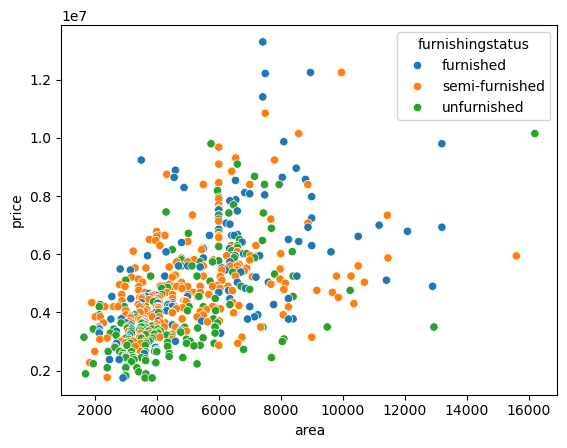

In [15]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

2. Create a .pairplot() to check the relationships between the independent and dependent variables

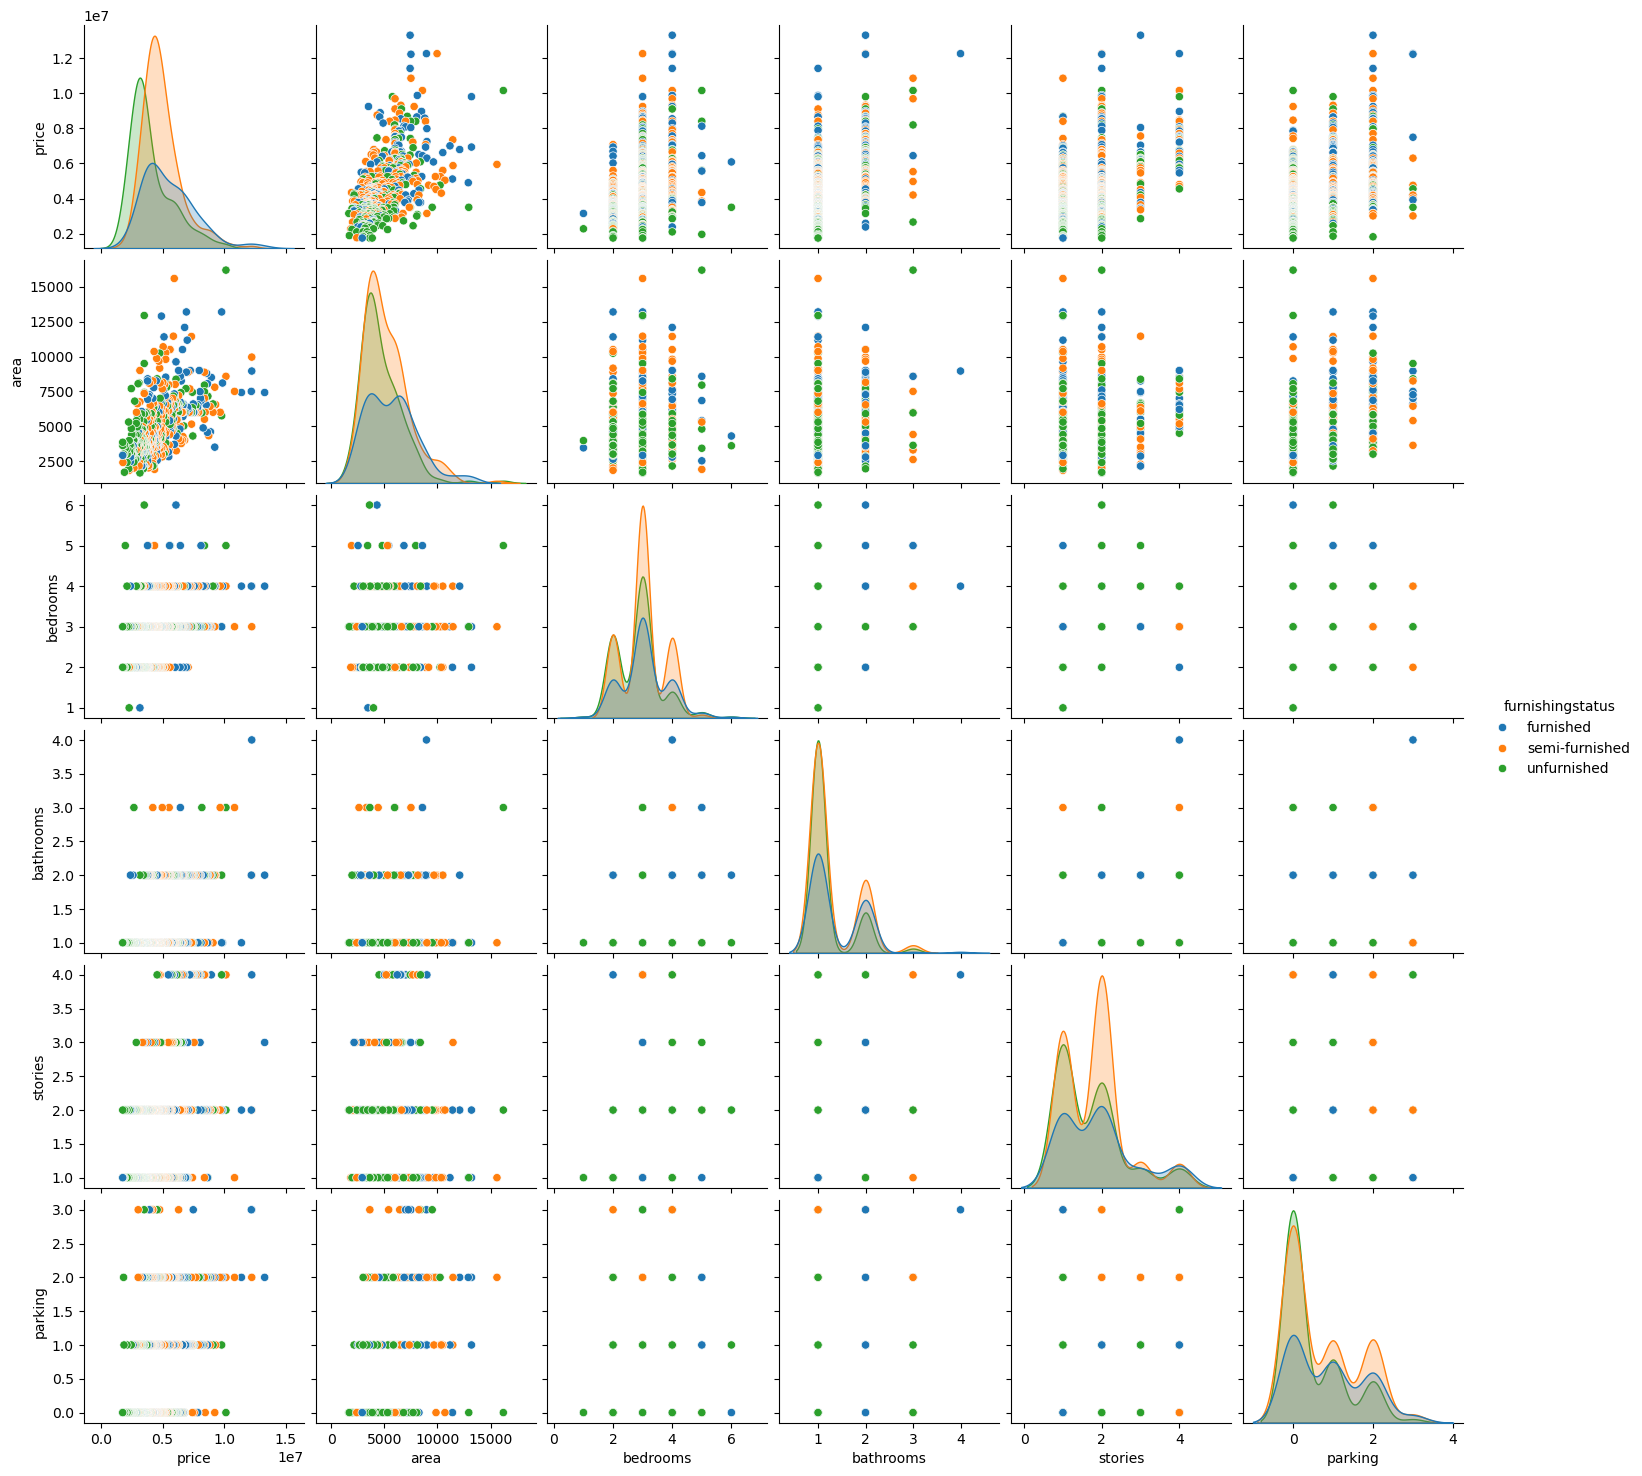

In [16]:
sns.pairplot(df,hue="furnishingstatus")

# C. Data pre-processing

3. Create a copy of the dataframe using .copy()

In [146]:
data=df.copy()

4. Apply the get_dummies() method to convert the categorical columns below into numbers/dummy variables.

In [148]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first='TRUE')

In [149]:
status

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,False,False,True,False,False,False,True,True
1,False,False,True,False,False,False,True,False
2,True,False,True,False,True,False,False,True
3,False,False,True,False,True,False,True,True
4,False,False,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...
540,False,True,True,False,True,False,False,False
541,True,False,False,False,False,False,False,False
542,False,True,True,False,False,False,False,False
543,False,False,False,False,False,False,False,False


5. Concatenate the converted columns to the dataframe copy using .concat()

In [150]:
data = pd.concat([data, status], axis = 1)

In [151]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,False,False,True,True,True,False,True,False


6. Drop the categorical columns below using .drop().
    -   furnishingstatus
    -   mainroad
    -   guestroom
    -   basement
    -   hotwaterheating
    -   airconditioning
    -   prefarea

In [152]:
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

In [153]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


# D. Feature Selection


7. Use .corr() to check for multicollinearity between the features/independent variables

In [154]:
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.063656,-0.280587,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.006156,-0.142278,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.050040,-0.126252,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.029834,-0.132107,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.003648,-0.082972,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.041327,-0.165705,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,1.000000,-0.588405,0.011450,0.005821,0.050284,0.063819,-0.053179,-0.011535
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.588405,1.000000,-0.133123,-0.099023,-0.117935,-0.059194,-0.094086,-0.081271
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.011450,-0.133123,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.005821,-0.099023,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897


8. Create a heatmap using .heatmap() to visualize the correlation in a plot.

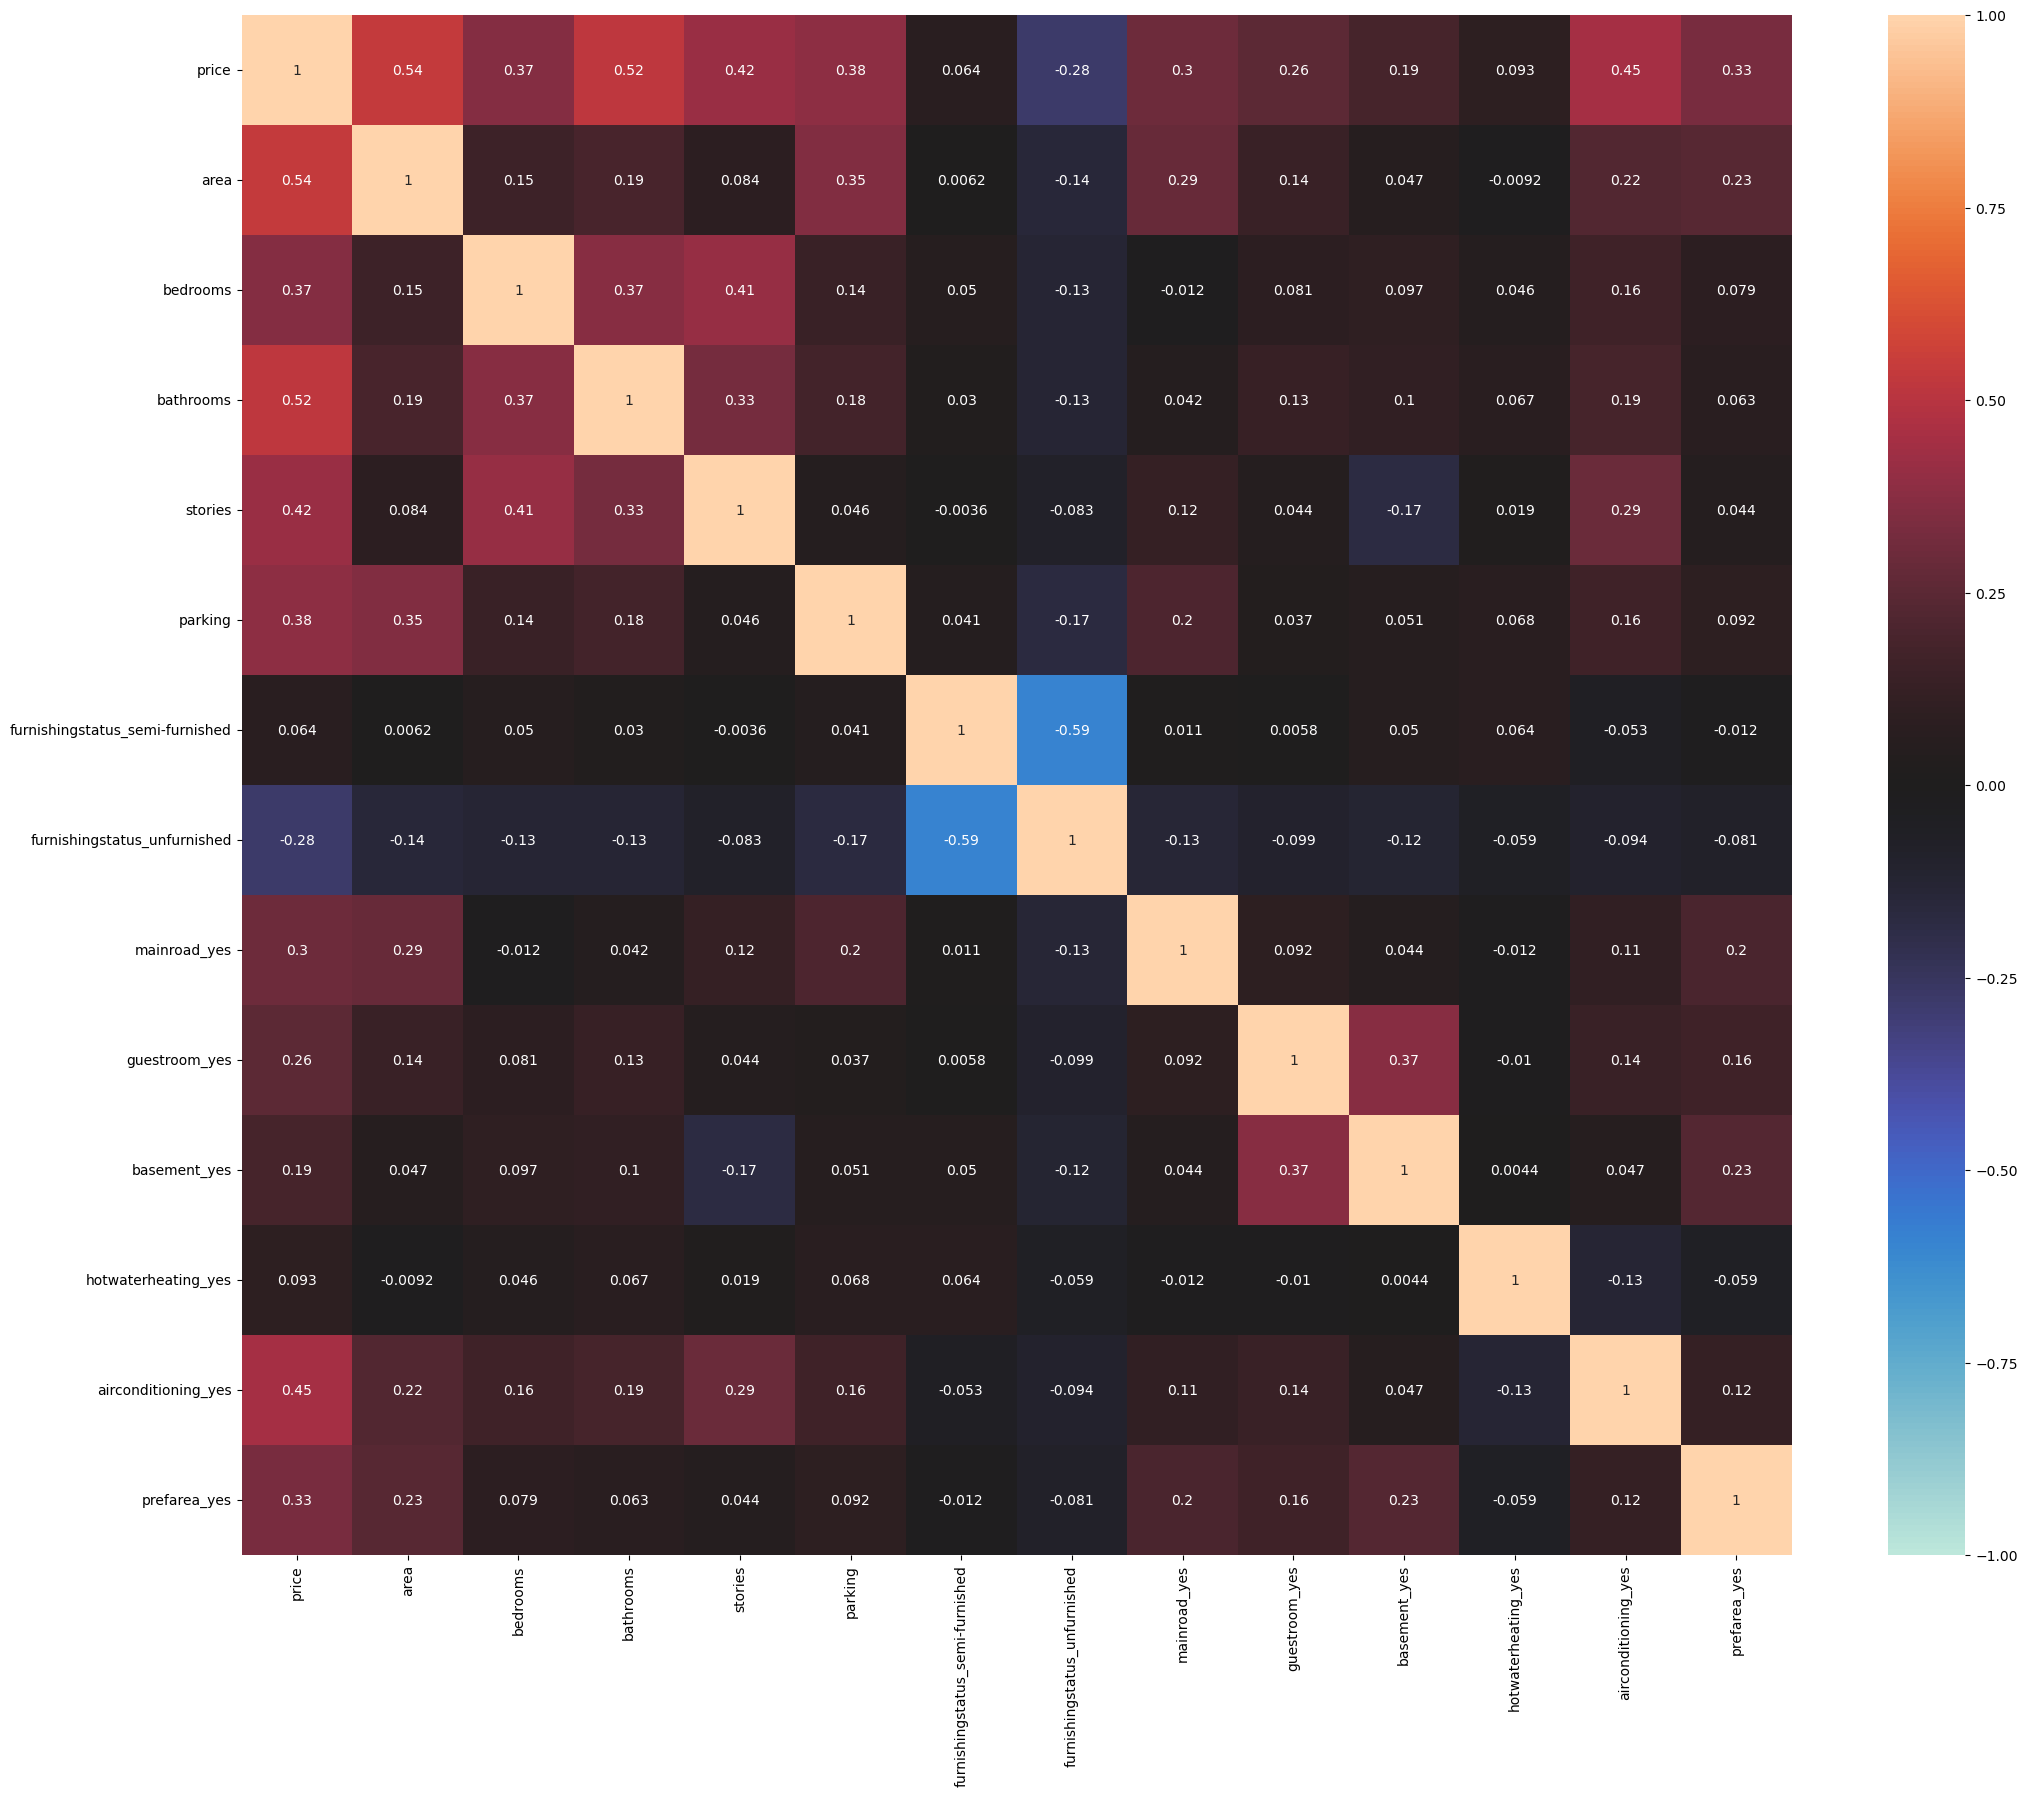

In [155]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

# E. Building the Model

9. Split the data set into a training and test set

In [870]:
X = data.drop(['price',
#               'area',
#'bedrooms',
#'bathrooms',
#'stories',
#'parking',
'furnishingstatus_semi-furnished', 
#'furnishingstatus_unfurnished',
#'mainroad_yes',
#'guestroom_yes',
'basement_yes',
'hotwaterheating_yes'
#'airconditioning_yes',
#'prefarea_yes'
],axis=1)
X = sm.add_constant(X)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

10. Use the the MinMaxScaler() method to apply scaling on the independent variables in the training and test set.

In [871]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [872]:
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,airconditioning_yes,prefarea_yes
175,1.0,9800,4,2,2,2,False,True,True,False,False
25,1.0,6540,4,2,2,2,False,True,True,True,True
253,1.0,3520,2,1,2,0,False,True,False,False,True
257,1.0,8250,3,1,1,0,False,True,False,False,False
431,1.0,3180,4,1,2,0,True,True,False,True,False


12. Create a new dataframe containing the scaled features


In [873]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,airconditioning_yes,prefarea_yes
0,0.0,0.582734,0.6,0.5,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0
1,0.0,0.348201,0.6,0.5,0.333333,0.666667,0.0,1.0,1.0,1.0,1.0
2,0.0,0.130935,0.2,0.0,0.333333,0.000000,0.0,1.0,0.0,0.0,1.0
3,0.0,0.471223,0.4,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.0,0.106475,0.6,0.0,0.333333,0.000000,1.0,1.0,0.0,1.0,0.0


13. Create a new instance of a Linear Regression model

In [874]:
model = LinearRegression()

14. Use the fit() method to train your model using the training set.

In [875]:
model.fit(X_train_scaled, y_train)

LinearRegression()

15. Use the predict() method using the test set

In [876]:
y_pred = model.predict(X_test_scaled)

16. Compute the r-square of the model

In [877]:
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

c:\Conda\envs\com222\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              380.0
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                   4.20e-103
Time:                        18:04:02   Log-Likelihood:                         -2495.8
No. Observations:                 164   AIC:                                      5012.
Df Residuals:                     154   BIC:                                      5043.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1          3.529e+06   5.03e+05      7.017      0.000    2.54e+06    4.52e+06
x2           3.05e+06   4.93e+05      6.183      0.000    2.08e+06    4.03e+06
x3          2.365e+06    3.5e+05      6.753      0.000    1.67e+06    3.06e+06
x4          1.001e+06   3.32e+05      3.019      0.003    3.46e+05    1.66e+06
x5          9.327e+05   2.89e+05      3.223      0.002    3.61e+05     1.5e+06
x6          4.488e+04   1.73e+05      0.259      0.796   -2.98e+05    3.87e+05
x7          1.301e+06   2.02e+05      6.453      0.000    9.03e+05     1.7e+06
x8          6.813e+05   2.09e+05      3.260      0.001    2.68e+05    1.09e+06
x9          8.059e+05   1.82e+05      4.432      0.000    4.47e+05    1.17e+06
x10         4.948e+05   1.91e+05      2.588      0.011    1.17e+05    8.73e+05
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.931
Skew:                          -0.067   Prob(JB):                        0.628
Kurtosis:                       2.656   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [878]:
olsmod.rsquared

0.9610485197003702